### Identifying Low-Risk Aircraft Using Aviation Accident Data

Problem Statement:
A new airline company wants to select aircraft types with the lowest accident risk to ensure safety and reliability. Your task is to analyze historical aviation accident data and identify aircraft types that have shown consistently low fatality and injury rates, helping the company make a data-informed decision.

##### Project Objective:

Clean and explore the aviation accident dataset
Analyze trends in accidents, injuries, and conditions
Identify aircraft with low accident frequency and minimal fatalities
Create visual and statistical evidence to support your insights
Communicate findings in both technical and non-technical formats

##### Tools I'll Use:

Python
pandas for data handling
matplotlib / seaborn for charts
numpy for calculations
Tableu for interactivity
Jupyter Notebook for analysis
GitHub for documentation
PowerPoint for non-technical presentation


##### The Key columns i'm focusing on are:

Aircraft.Make, Model (type of aircraft — might need to check these columns)
Event.Date, Location, Country
Total.Fatal.Injuries, Total.Serious.Injuries, Total.Uninjured
Purpose.of.flight, Weather.Condition, Broad.phase.of.flight


In [2]:
# Importing the libraries i'll need for this project
# I will be using the following libraries:  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")    
%matplotlib inline

In [3]:
# :oading the dataset
df = pd.read_csv('AviationData.csv', encoding='latin1', low_memory=False)

# Displaying the first 5 rows of the dataset
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# Shape of the dataset
# The shape of the dataset will give us the number of rows and columns in the dataset.
df.shape
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 88889 rows and 31 columns.


In [5]:
# Basic information about the dataset
# The info() method will give us the number of non-null values in each column and the data type of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
# Check for missing values
# The isnull() method will return a DataFrame with the same shape as the original DataFrame, but with True for missing values and False for non-missing values.
# The sum() method will return the number of missing values in each column.
# The sort_values() method will sort the values in descending order.
df.isnull().sum().sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38640
Airport.Name              36099
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7077
Report.Status              6381
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1317
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Event.Date                    0
Accident.Number               0
Investigation.Type            0
Event.Id                      0
dtype: i

In [7]:
(df.isnull().sum()/len(df))*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

In [8]:
# A summary of numerical columns
# The describe() method will return a DataFrame with the count, mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile, and maximum for each numerical column.
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [9]:
# The to_datetime() method will convert the column to datetime format.
# The errors='coerce' argument will convert any invalid parsing to NaT (Not a Time).
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df = df[df['Event.Date'].dt.year.between(2012, 2022)]
# adding a new column year
# The dt accessor allows us to access the datetime properties of the column.
# The year property will return the year of the datetime.
df['Year'] = df['Event.Date'].dt.year
df['Year'].head()


71225    2012
71226    2012
71227    2012
71228    2012
71229    2012
Name: Year, dtype: int64

### Data Preparation
I began my project by loading a dataset of aviation accidents. The dataset contained over 88,000 records and 31 columns. Since my goal is to identify aircraft makes and models with low accident risk, I reviewed all columns to determine which ones were relevant.

I dropped Airport.Code and Airport.Name because i'm not doing location based analysis and don't directly relate to aircraft risk levels; Schedule, Air.Carrier, and FAR.Description because they had so many missing values and lastly Longitude and Latitude because i'm not plotting maps . Removing these helps reduce noise and improve focus on useful variables.

In [10]:
#columns_to_drop = 
df=df.drop(['Schedule', 'Air.carrier' ,'FAR.Description', 'Longitude', 'Latitude', 'Airport.Code', 'Airport.Name'], axis=1)


In [11]:
# dropping duplicates
# The drop_duplicates() method will remove duplicate rows from the DataFrame.
df= df.drop_duplicates()

In [12]:
# Convert injury columns to numeric
# The pd.to_numeric() method will convert the column to numeric format.
# The errors='coerce' argument will convert any invalid parsing to NaN (Not a Number).
injury_cols = [
    'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Minor.Injuries', 'Total.Uninjured'
]
for col in injury_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [13]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year
71225,20120102X93914,Accident,ERA12LA131,2012-01-01,"Willimantic, CT",United States,Non-Fatal,Substantial,Airplane,N667JH,...,Personal,0.0,0.0,0.0,1.0,VMC,NaN,A partial loss of engine power due to carburet...,25-09-2020,2012
71226,20120103X02043,Accident,CEN12LA120,2012-01-01,"Lohn, TX",United States,Non-Fatal,Substantial,Helicopter,N9021R,...,Aerial Observation,0.0,0.0,2.0,0.0,VMC,NaN,The improper installation of the tail rotor ge...,25-09-2020,2012
71227,20111230X02532,Accident,WPR12CA073,2012-01-02,"Eureka, CA",United States,Non-Fatal,Substantial,Airplane,N45WM,...,Personal,0.0,0.0,0.0,1.0,VMC,NaN,A collision with a deer while landing.,25-09-2020,2012
71228,20120103X35104,Accident,ERA12CA134,2012-01-02,"River Ranch, FL",United States,Non-Fatal,Substantial,Airplane,N171GS,...,Personal,0.0,0.0,0.0,3.0,VMC,NaN,The pilots failure to maintain directional co...,25-09-2020,2012
71229,20120103X94513,Accident,ERA12LA132,2012-01-02,"Shelter Island, NY",United States,Non-Fatal,Substantial,Airplane,N8282P,...,Personal,0.0,0.0,0.0,1.0,VMC,NaN,"A hard landing, which resulted in a failure of...",25-09-2020,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,N1867H,...,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,...,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,...,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022


In [14]:
df.isnull().sum().sort_values(ascending=False)

Broad.phase.of.flight     17664
Report.Status              5680
Engine.Type                4836
Purpose.of.flight          3534
Weather.Condition          3389
Number.of.Engines          3137
Aircraft.damage            1227
Publication.Date           1013
Injury.Severity             849
Aircraft.Category           315
Model                        20
Make                         15
Registration.Number          10
Country                       0
Location                      0
Event.Date                    0
Accident.Number               0
Investigation.Type            0
Year                          0
Amateur.Built                 0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Event.Id                      0
dtype: int64

In [15]:
df.replace(["", "NaN", "nan", "N/A", "n/a"], pd.NA, inplace=True)

In [16]:
df.isnull().sum().sort_values(ascending=False)

Broad.phase.of.flight     17664
Report.Status              5680
Engine.Type                4836
Purpose.of.flight          3534
Weather.Condition          3389
Number.of.Engines          3137
Aircraft.damage            1227
Publication.Date           1013
Injury.Severity             849
Aircraft.Category           315
Model                        20
Make                         15
Registration.Number          10
Country                       0
Location                      0
Event.Date                    0
Accident.Number               0
Investigation.Type            0
Year                          0
Amateur.Built                 0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Event.Id                      0
dtype: int64

The Final Columns i Selected for Analysis
My main goal is to identify aircraft with low accident risk based on injury statistics. So, I decided to only keep the most relevant columns for that, like:


Column Name	Why Keep It?

- Make - Manufacturer info, useful to group accidents, 

- Model - Aircraft model, key for risk identification,

- Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured - Injury stats per event

- Aircraft.Category, Engine.Type, Number.of.Engines - Aircraft specifications

- Event.Date, Year - Time-based trends

- Purpose.of.flight, Weather.Condition, Aircraft.damage, Broad.phase.of.flight-Optional features for deeper patterns (can test correlation later)

- Accident.Number, Event.Id

i now decided to further drop:

- Registration.Number, Report.Status,Location, Country, Amateur.Built, 

- Publication.Date — too sparse or not helpful for aircraft-level risk analysis.



In [17]:
# Final columns to keep
# The columns_to_keep list contains the names of the columns that we want to keep in the DataFrame.
columns_to_keep = [
    'Make', 'Model', 'Accident.Number', 'Event.Id', 'Aircraft.Category', 'Engine.Type', 'Number.of.Engines',
    'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
    'Event.Date', 'Year', 'Purpose.of.flight', 'Weather.Condition',
    'Aircraft.damage', 'Broad.phase.of.flight'
]

In [18]:
# Keep only the columns in the columns_to_keep list
df = df[columns_to_keep]

In [19]:
# Drop rows where make or model is missing(since we are identifying the safest aircraft)
# The dropna() method will remove rows with missing values in the specified columns.
df = df.dropna(subset=['Make', 'Model'])

In [20]:
# strips whitespace and converts to title case
df['Make'] = df['Make'].str.title().str.strip()
df['Model'] = df['Model'].str.title().str.strip()

In [21]:
# Reset index
# The reset_index() method will reset the index of the DataFrame.
# The drop=True argument will drop the old index and not add it as a column in the DataFrame.   
df.reset_index(drop=True, inplace=True)

In [22]:
df

,Make,Model,Accident.Number,Event.Id,Aircraft.Category,Engine.Type,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Date,Year,Purpose.of.flight,Weather.Condition,Aircraft.damage,Broad.phase.of.flight
0,Haney John F B,Seastar Xp,ERA12LA131,20120102X93914,Airplane,Reciprocating,1.0,0.0,0.0,0.0,1.0,2012-01-01,2012,Personal,VMC,Substantial,NaN
1,Continental Copters Inc.,47G2,CEN12LA120,20120103X02043,Helicopter,Reciprocating,1.0,0.0,0.0,2.0,0.0,2012-01-01,2012,Aerial Observation,VMC,Substantial,NaN
2,Mcadam W E,Christen Eagle Ii,WPR12CA073,20111230X02532,Airplane,Reciprocating,1.0,0.0,0.0,0.0,1.0,2012-01-02,2012,Personal,VMC,Substantial,NaN
3,Maule,M-5-180C,ERA12CA134,20120103X35104,Airplane,Reciprocating,1.0,0.0,0.0,0.0,3.0,2012-01-02,2012,Personal,VMC,Substantial,NaN
4,Piper,Pa-34-200T,ERA12LA132,20120103X94513,Airplane,Reciprocating,2.0,0.0,0.0,0.0,1.0,2012-01-02,2012,Personal,VMC,Substantial,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17636,Piper,Pa-28-151,ERA23LA093,20221227106491,NaN,NaN,NaN,0.0,1.0,0.0,0.0,2022-12-26,2022,Personal,NaN,NaN,NaN
17637,Bellanca,7Eca,ERA23LA095,20221227106494,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2022-12-26,2022,NaN,NaN,NaN,NaN
17638,American Champion Aircraft,8Gcbc,WPR23LA075,20221227106497,Airplane,NaN,1.0,0.0,0.0,0.0,1.0,2022-12-26,2022,Personal,VMC,Substantial,NaN
17639,Cessna,210N,WPR23LA076,20221227106498,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2022-12-26,2022,Personal,NaN,NaN,NaN


#### Exploratory Data Analysis (EDA)

The very basic questions that i ask myself according to the df:
- How many accidents per Make and Model?

- Which models have lowest fatality counts?

- How is the injury distribution (fatal, serious, minor, uninjured)?

- Are there trends over the years (like improving safety)?

- How do things like Weather Conditions or Phase of Flight affect injury rates?



In [23]:
# Setting a nice plot style
# The set() method will set the style of the plot.
# The style can be 'darkgrid', 'whitegrid', 'dark', 'white', or 'ticks'.
# The palette can be 'deep', 'muted', 'bright', 'pastel', 'dark', or 'colorblind'.
# The font_scale argument will scale the font size of the plot.
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

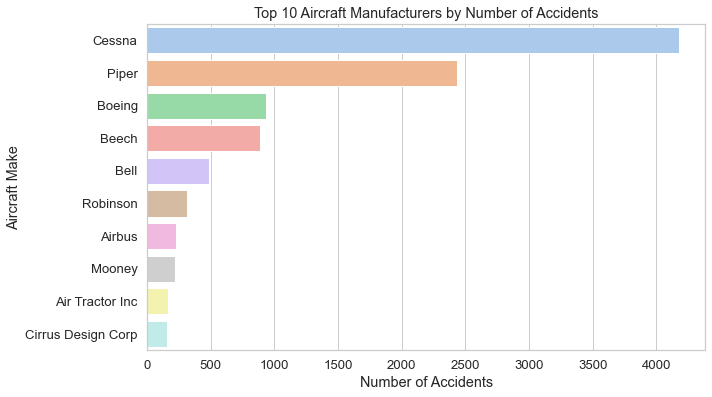

In [24]:
# How many accidents per Make
# The value_counts() method will return a Series containing counts of unique values in the specified column.
# The head(10) method will return the top 10 values in the Series.
accidents_by_make = df['Make'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=accidents_by_make.values, y=accidents_by_make.index)
plt.title('Top 10 Aircraft Manufacturers by Number of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Make')
plt.show()

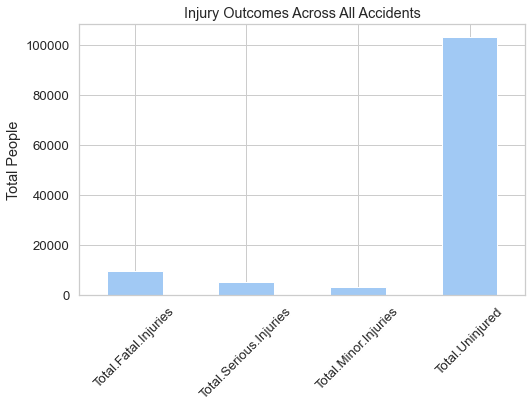

In [25]:
# Injury distribution
# The injury_cols list contains the names of the columns that we want to plot.
# The sum() method will return the sum of the values in each column.
# The plot() method will plot the values in the Series.
# The kind='bar' argument will create a bar plot.
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df[injury_cols].sum().plot(kind='bar', figsize=(8,5), title='Injury Outcomes Across All Accidents')
plt.ylabel('Total People')
plt.xticks(rotation=45)
plt.show()

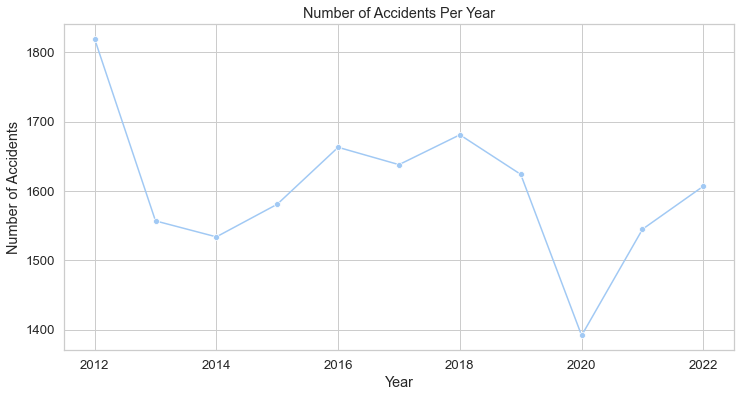

In [26]:
# Number of accidents per year

accidents_by_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.lineplot(x=accidents_by_year.index, y=accidents_by_year.values, marker='o')
plt.title('Number of Accidents Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

#### Aircraft Safety Evaluation

 Grouped Accident records by aircraft make and model.  Calculated Fatality rates as the ratio of fatal injuries to total accidents. Ranked Models with a meaningful number of accident reports (>10). I then identified aircraft models with the lowest fatality rates as the safest candidates.

How I calculated the fatility rate:
- I grouped data by Make + Model.

- Did a sum of total fatal injuries and total number of accidents for each model.

- Fatality Rate = (Total Fatal Injuries) / (Total Accidents)

- Sort by lowest fatality rate to find safest models

In [27]:
print(df.columns.tolist())

['Make', 'Model', 'Accident.Number', 'Event.Id', 'Aircraft.Category', 'Engine.Type', 'Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Event.Date', 'Year', 'Purpose.of.flight', 'Weather.Condition', 'Aircraft.damage', 'Broad.phase.of.flight']


In [28]:
# Group by Make and Model
# The groupby() method will group the DataFrame by the specified columns.
# The agg() method will aggregate the values in the specified columns.
grouped = df.groupby(['Make', 'Model']).agg(
    total_accidents=('Accident.Number', 'count'),
    total_fatal_injuries=('Total.Fatal.Injuries', 'sum')
).reset_index()

In [29]:
# Fill NaN fatal injuries with 0
# The fillna() method will fill NaN values with the specified value.
grouped['total_fatal_injuries'] = grouped['total_fatal_injuries'].fillna(0)

In [30]:
# Calculate fatality rate
# The fatality rate is the number of fatal injuries divided by the number of accidents.
# The fatality rate is a measure of the safety of the aircraft.
grouped['fatality_rate'] = grouped['total_fatal_injuries'] / grouped['total_accidents']

In [31]:
# Filter: Only consider models with enough accidents (e.g., >10) to be meaningful

grouped_filtered = grouped[grouped['total_accidents'] >= 10]

In [32]:
# Sort by lowest fatality rate
# The sort_values() method will sort the DataFrame by the specified column.
safest_aircraft = grouped_filtered.sort_values('fatality_rate').head(10)

In [33]:
# Show the safest aircraft
print(safest_aircraft[['Make', 'Model', 'total_accidents', 'total_fatal_injuries', 'fatality_rate']])

                     Make     Model  total_accidents  total_fatal_injuries  \
4012                Piper     Pa 22               13                   0.0   
670                 Beech        23               16                   0.0   
3481                Maule       Mx7               16                   0.0   
4549  Robinson Helicopter       R22               21                   0.0   
3998                Piper     Pa 18               27                   0.0   
868                  Bell    206L-3               11                   0.0   
1502               Cessna      180H               16                   0.0   
910                  Bell    Oh 58A               11                   0.0   
1074               Boeing   737-800               20                   0.0   
1989      Cubcrafters Inc  Cc11-160               17                   0.0   

      fatality_rate  
4012            0.0  
670             0.0  
3481            0.0  
4549            0.0  
3998            0.0  
868      

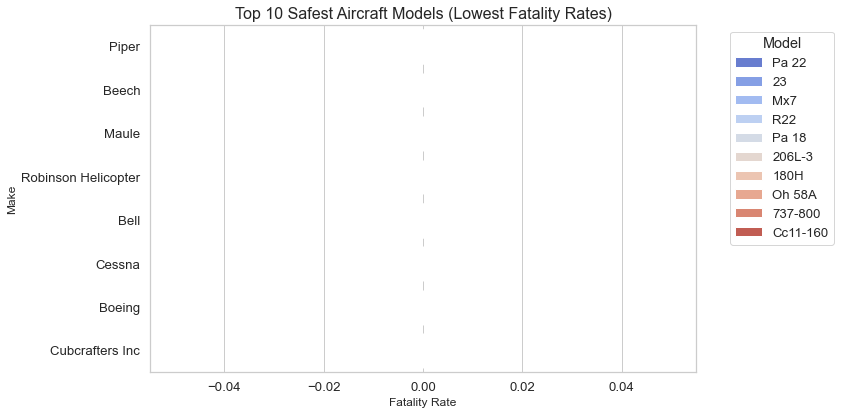

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=safest_aircraft, 
    y='Make', x='fatality_rate', 
    hue='Model', dodge=False, palette='coolwarm'
)
plt.title('Top 10 Safest Aircraft Models (Lowest Fatality Rates)', fontsize=16)
plt.xlabel('Fatality Rate', fontsize=12)
plt.ylabel('Make', fontsize=12)
# plt.xlim(0, safest_aircraft['fatality_rate'].max()*1.2)  # Extend x axis a bit for visibility
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [35]:
# Filter for minimum accidents
filtered_aircraft = safest_aircraft[safest_aircraft['total_accidents'] >= 10]

# Calculate Safety Score
safest_aircraft['Safety_Score'] = 1 / (safest_aircraft['fatality_rate'] + 0.01)

# Sort by highest Safety Score
safest_aircraft = safest_aircraft.sort_values('Safety_Score', ascending=False)

# Display the top 10 safest aircraft
safest_aircraft[['Make', 'Model', 'fatality_rate', 'Safety_Score']].head(10)


,Make,Model,fatality_rate,Safety_Score
4012,Piper,Pa 22,0.0,100.0
670,Beech,23,0.0,100.0
3481,Maule,Mx7,0.0,100.0
4549,Robinson Helicopter,R22,0.0,100.0
3998,Piper,Pa 18,0.0,100.0
868,Bell,206L-3,0.0,100.0
1502,Cessna,180H,0.0,100.0
910,Bell,Oh 58A,0.0,100.0
1074,Boeing,737-800,0.0,100.0
1989,Cubcrafters Inc,Cc11-160,0.0,100.0


In [36]:
# 1. Filter aircraft with at least 5 accidents
filtered_aircraft = safest_aircraft[safest_aircraft['total_accidents'] >= 5]

# 2. Calculate Safety Score
filtered_aircraft['Safety_Score'] = 1 / (filtered_aircraft['fatality_rate'] + 0.01)

# 3. Sort descending by Safety Score (higher score = safer)
filtered_aircraft = filtered_aircraft.sort_values('Safety_Score', ascending=False)

# 4. Show top 10 safest aircraft
top_10_safest = filtered_aircraft[['Make', 'Model', 'total_accidents', 'fatality_rate', 'Safety_Score']].head(10)

# 5. Display the table
print(top_10_safest)


                     Make     Model  total_accidents  fatality_rate  \
4012                Piper     Pa 22               13            0.0   
670                 Beech        23               16            0.0   
3481                Maule       Mx7               16            0.0   
4549  Robinson Helicopter       R22               21            0.0   
3998                Piper     Pa 18               27            0.0   
868                  Bell    206L-3               11            0.0   
1502               Cessna      180H               16            0.0   
910                  Bell    Oh 58A               11            0.0   
1074               Boeing   737-800               20            0.0   
1989      Cubcrafters Inc  Cc11-160               17            0.0   

      Safety_Score  
4012         100.0  
670          100.0  
3481         100.0  
4549         100.0  
3998         100.0  
868          100.0  
1502         100.0  
910          100.0  
1074         100.0  
1989    

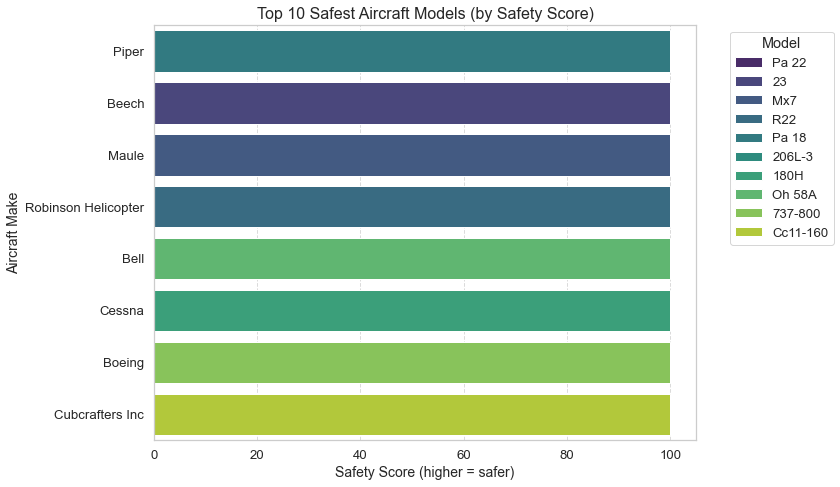

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_10_safest,
    y='Make', 
    x='Safety_Score',
    hue='Model', 
    dodge=False,
    palette='viridis'
)

# Titles and labels
plt.title('Top 10 Safest Aircraft Models (by Safety Score)', fontsize=16)
plt.xlabel('Safety Score (higher = safer)', fontsize=14)
plt.ylabel('Aircraft Make', fontsize=14)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


### Fatality rate by purpose of flight

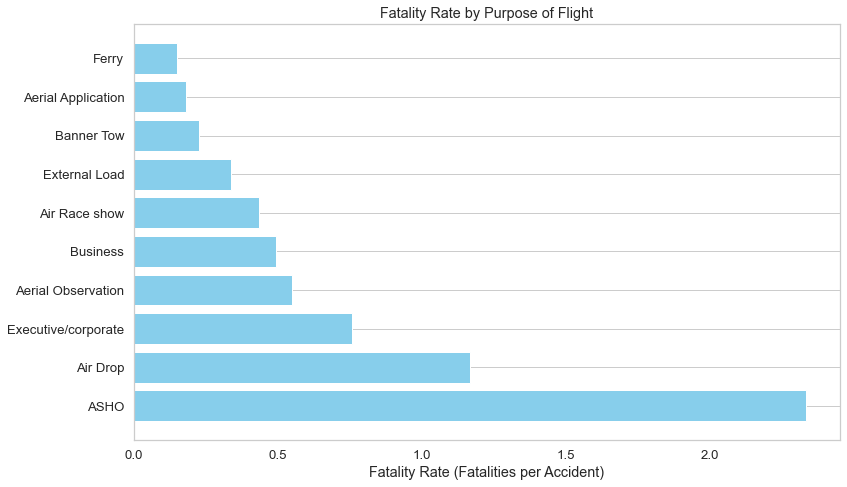

In [38]:
import matplotlib.pyplot as plt

# Group by Purpose.of.flight
purpose_group = df.groupby('Purpose.of.flight').agg(
    total_accidents=('Event.Id', 'count'),
    total_fatal_injuries=('Total.Fatal.Injuries', 'sum')
).reset_index()

# Calculate fatality rate and safety score
purpose_group['fatality_rate'] = purpose_group['total_fatal_injuries'] / purpose_group['total_accidents'].head(10)
# Fill NaN values with 0 for safety score calculation
purpose_group['safety_score'] = 1 / (1 + purpose_group['fatality_rate'])

# Sort purposes by fatality rate
purpose_group_sorted = purpose_group.sort_values('fatality_rate', ascending=True)

# Plot
plt.figure(figsize=(12, 7))
plt.barh(purpose_group_sorted['Purpose.of.flight'], purpose_group_sorted['fatality_rate'], color='skyblue')
plt.xlabel('Fatality Rate (Fatalities per Accident)')
plt.title('Fatality Rate by Purpose of Flight')
plt.gca().invert_yaxis()  # Highest safety on top
plt.grid(axis='x')
plt.tight_layout()
plt.show()


#### Recommendation
Based on the analysis, flight purposes such as Air Show Operations (ASHO) and Air Drop are associated with the highest fatality rates and should be approached with extreme caution or avoided altogether unless specialized risk mitigation measures are implemented. Executive/Corporate, Aerial Observation, and Business flights present moderate risk and would require enhanced safety protocols to operate safely. On the other hand, Ferry, Aerial Application, and Banner Tow operations show the lowest fatality rates, making them the safest and most favorable categories for the company to prioritize in launching the new aviation business.

In [39]:
# Rank purposes based on safety_score (higher score = safer)
purpose_ranking = purpose_group_sorted.sort_values('safety_score', ascending=False).head(10)

# Display the top safest purposes
print("Safest Purposes of Flight:")
print(purpose_ranking[['Purpose.of.flight', 'total_accidents', 'total_fatal_injuries', 'fatality_rate', 'safety_score']])


Safest Purposes of Flight:
     Purpose.of.flight  total_accidents  total_fatal_injuries  fatality_rate  \
9                Ferry               67                  10.0       0.149254   
1   Aerial Application              702                 126.0       0.179487   
5           Banner Tow               49                  11.0       0.224490   
8        External Load               80                  27.0       0.337500   
4        Air Race show               62                  27.0       0.435484   
6             Business              410                 202.0       0.492683   
2   Aerial Observation              217                 119.0       0.548387   
7  Executive/corporate               62                  47.0       0.758065   
3             Air Drop                6                   7.0       1.166667   
0                 ASHO                6                  14.0       2.333333   

   safety_score  
9      0.870130  
1      0.847826  
5      0.816667  
8      0.747664  
4 

#### Safest score by number of engines

In [40]:
# Group by Number of Engines
engines_group = df.groupby('Number.of.Engines').agg(
    total_accidents=('Event.Id', 'count'),
    total_fatal_injuries=('Total.Fatal.Injuries', 'sum')
).reset_index()

# Calculate fatality rate and safety score
engines_group['fatality_rate'] = engines_group['total_fatal_injuries'] / engines_group['total_accidents']
engines_group['safety_score'] = 1 - engines_group['fatality_rate']

# Sort from safest to riskiest
engines_group_sorted = engines_group.sort_values('safety_score', ascending=False)

# Show it
print(engines_group_sorted)


   Number.of.Engines  total_accidents  total_fatal_injuries  fatality_rate  \
5                6.0                1                   0.0       0.000000   
6                8.0                3                   0.0       0.000000   
0                0.0              178                  30.0       0.168539   
3                3.0               11                   2.0       0.181818   
1                1.0            12436                3827.0       0.307736   
4                4.0               44                  22.0       0.500000   
2                2.0             1850                1314.0       0.710270   

   safety_score  
5      1.000000  
6      1.000000  
0      0.831461  
3      0.818182  
1      0.692264  
4      0.500000  
2      0.289730  


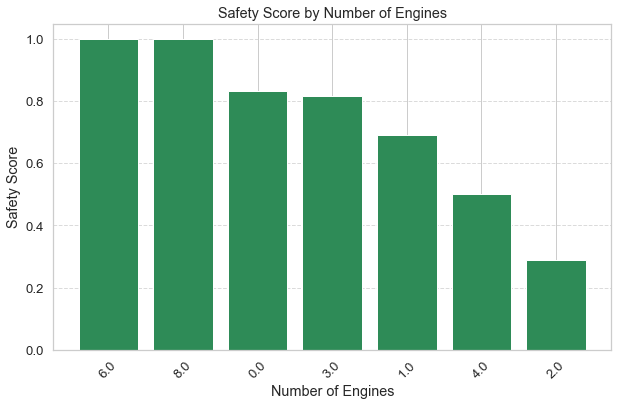

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(engines_group_sorted['Number.of.Engines'].astype(str), engines_group_sorted['safety_score'], color='seagreen')
plt.xlabel('Number of Engines')
plt.ylabel('Safety Score')
plt.title('Safety Score by Number of Engines')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Recommendation
Based on the analysis of safety scores by the number of engines, aircraft with six or eight engines demonstrate the highest safety outcomes and are strongly recommended for operations prioritizing passenger and cargo safety.

Aircraft with two engines show significantly lower safety scores, suggesting higher operational risk.

As a result, when expanding the company's aviation business, it is recommended to prioritize multi-engine aircraft, especially those with six or more engines, while exercising caution when considering aircraft with two engines.

#### Aircraft Damage Distribution for Top 5 Makes

In [42]:
# Group by Make and Aircraft Damage
make_damage = df.groupby(['Make', 'Aircraft.damage']).agg(
    total_accidents=('Event.Id', 'count')
).reset_index()

# Pivot table to make Aircraft.damage types as columns
pivot_table = make_damage.pivot(index='Make', columns='Aircraft.damage', values='total_accidents').fillna(0)

# Add a total accidents column for sorting
pivot_table['total_accidents'] = pivot_table.sum(axis=1)

# Sort by total accidents
pivot_table_sorted = pivot_table.sort_values('total_accidents', ascending=False)

pivot_table_sorted.head(10)  # Show top 10


Aircraft.damage,Destroyed,Minor,Substantial,Unknown,total_accidents
Make,,,,,
Cessna,460.0,63.0,3520.0,38.0,4081.0
Piper,331.0,28.0,2011.0,15.0,2385.0
Beech,177.0,19.0,663.0,5.0,864.0
Bell,86.0,3.0,377.0,5.0,471.0
Boeing,26.0,205.0,185.0,11.0,427.0
Robinson,74.0,6.0,214.0,4.0,298.0
Mooney,32.0,1.0,180.0,3.0,216.0
Air Tractor Inc,22.0,1.0,143.0,1.0,167.0
Cirrus Design Corp,27.0,6.0,124.0,1.0,158.0


In [43]:
# Normalize each row
pivot_table_normalized = pivot_table.div(pivot_table['total_accidents'], axis=0)

pivot_table_normalized.head(10)


Aircraft.damage,Destroyed,Minor,Substantial,Unknown,total_accidents
Make,,,,,
177Mf Llc,0.0,0.0,1.0,0.0,1.0
2021Fx3 Llc,0.0,0.0,1.0,0.0,1.0
3Xtrim,1.0,0.0,0.0,0.0,1.0
5 Rivers Llc,0.0,0.0,1.0,0.0,1.0
737,0.0,1.0,0.0,0.0,1.0
781569 Inc,0.0,0.0,1.0,0.0,1.0
Aaa Aircraft Llc,0.0,0.0,1.0,0.0,1.0
Ab Sportine Aviacija,0.5,0.0,0.5,0.0,1.0
Abbett Gerry,0.0,0.0,1.0,0.0,1.0


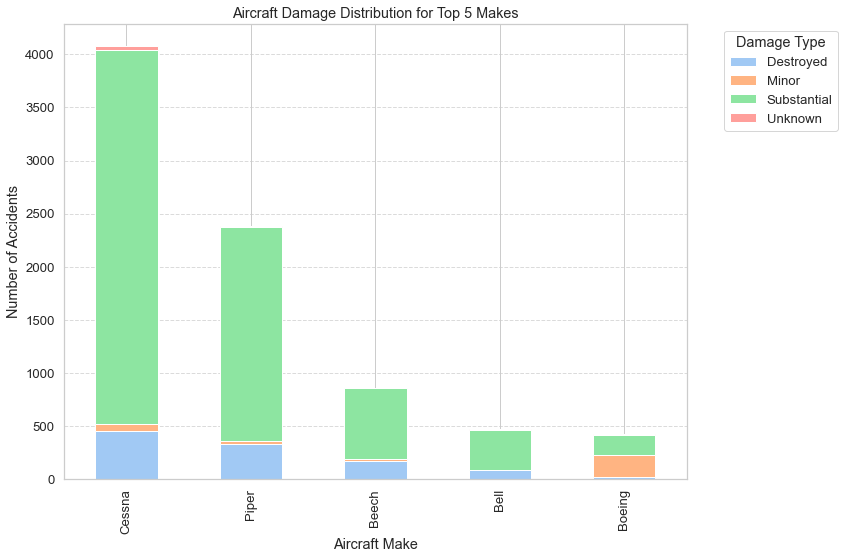

In [44]:
# Let's plot a stacked bar chart
pivot_table_sorted.drop('total_accidents', axis=1).head(5).plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Aircraft Damage Distribution for Top 5 Makes')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.legend(title='Damage Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Recommendation
Based on the aircraft damage analysis, Boeing aircraft exhibit a lower risk profile, with a higher proportion of minor damage outcomes compared to Cessna, Piper, Beech, and Bell.

While Cessna and Piper have the highest number of incidents, the majority involve substantial rather than catastrophic (destroyed) damage.

Therefore, for operations prioritizing minimal repair costs and passenger safety, Boeing models are recommended.
For operations tolerating moderate repair risks, Cessna and Piper could be considered, with thorough maintenance and inspection protocols.

In [50]:
# Grouping by Engine Type and counting accidents
engine_accidents = df.groupby('Engine.Type').size().reset_index(name='Accident.Count')

# Sorting for better visualization
engine_accidents = engine_accidents.sort_values(by='Accident.Count', ascending=False).head(10)

# Display the result
print(engine_accidents)  # Show top 10 engine types


        Engine.Type  Accident.Count
6     Reciprocating           10714
9        Turbo Prop             748
10      Turbo Shaft             693
7         Turbo Fan             533
8         Turbo Jet              65
12          Unknown              25
5              None              19
1   Geared Turbofan              12
0          Electric              10
3                LR               2


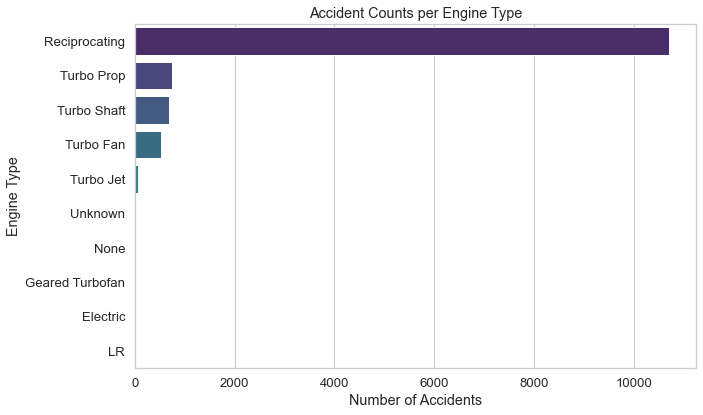

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=engine_accidents, x='Accident.Count', y='Engine.Type', palette='viridis')    
plt.title('Accident Counts per Engine Type')
plt.xlabel('Number of Accidents')
plt.ylabel('Engine Type')
plt.tight_layout()
plt.show()


In [44]:
# Fill any missing values in 'Total.Fatal.Injuries' with 0
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0)


In [45]:
# Group by 'Make' and 'Model' and count how many accidents there are
accident_counts = df.groupby(['Make', 'Model']).size().reset_index(name='total_accidents')

# Merge the accident counts back into your main dataframe
df = df.merge(accident_counts, on=['Make', 'Model'], how='left')


In [46]:
# First, make sure 'Total.Fatal.Injuries' and 'total_accidents' are available

# Calculate fatality rate (safe fallback in case of missing values)
df['fatality_rate'] = df['Total.Fatal.Injuries'] / df['total_accidents']

# Fill any NaN fatality rates (e.g., divisions by zero) with 0
df['fatality_rate'] = df['fatality_rate'].fillna(0)

# Calculate Safety Score
df['Safety_Score'] = (1 - df['fatality_rate']) * 100

# Again, fill any NaN Safety_Score with 0
df['Safety_Score'] = df['Safety_Score'].fillna(0)

# Preview
df[['Make', 'Model', 'total_accidents', 'Total.Fatal.Injuries', 'fatality_rate', 'Safety_Score']].head()


,Make,Model,total_accidents,Total.Fatal.Injuries,fatality_rate,Safety_Score
0,Haney John F B,Seastar Xp,1,0.0,0.0,100.0
1,Continental Copters Inc.,47G2,1,0.0,0.0,100.0
2,Mcadam W E,Christen Eagle Ii,1,0.0,0.0,100.0
3,Maule,M-5-180C,4,0.0,0.0,100.0
4,Piper,Pa-34-200T,15,0.0,0.0,100.0


In [ ]:

df_cleaned = df.copy()
# Save the cleaned DataFrame to a new CSV file to be used in tableu analysis
# The to_csv() method will save the DataFrame to a CSV file.
df_cleaned.to_csv('C:/Users/User/OneDrive/Documents/Moringa/Personal work/cleaned_aviation_data.csv', index=False)